# Math 3410 Assignment 3A
## Linear Recurrences

A *linear recurrence* of length $k$ is a sequence $[x_n)$ that is recursively defined, with successive terms in the sequence defined in terms of the previous $k$ terms, via a linear recursion formula of the form

$$x_{n+k} = a_0x_k + a_1x_{k+1}+\cdots + a_{k-1}x_{n+k-1}.$$

(Here we assume $a_0\neq 0$ to have the appropriate length.)

As demonstrated in the textbook, the set of all sequences satisfying a linear recursion of length $k$ form a subspace $V$ of the vector space $\mathbb{R}^\infty$ of all real-valued sequences. Since each sequence is determined by the $k$ initial conditions $x_0, x_1, \ldots, x_{k-1}$, we see that $V$ is isomorphic to $\mathbb{R}^k$.

The goal of this assignment is to understand how to obtain *closed form* expressions for a recursively defined sequence using linear algebra. That is, rather than having to generate terms of the sequence one-by-one using the recursion formula, we want a function of $n$ that will produce each term $x_n$ in the sequence.

Since we know the dimension of the space $V$ of solutions, it suffices to understand two things:

- How to produce a basis for $V$.
- How to write a given solution in terms of that basis.

The key observation is that for each recusion relation, there is an associated polynomial. For the recursion

$$x_{n+k} = a_0x_k + a_1x_{k+1}+\cdots + a_{k-1}x_{n+k-1},$$

the associated polynomial is

$$p(x) = x^k - a_{k-1}x^{k-1}-\cdots -a_1x-a_0.$$

The key result is Theorem 7.5.4. If we can factor $$p(x)$$ completely over the reals as

$$p(x) = (x-\lambda_1)^{m_1}(x-\lambda_2)^{m_2}\cdots (x-\lambda_p)^{m_p},$$

then a basis for the space of solutions is given by

$$\begin{aligned}
\left[\lambda_1^n\right), & \left[n\lambda_1^n\right),\ldots, \left[n^{m_1-1}\lambda_1^n\right)\\
\left[\lambda_2^n\right), & \left[n\lambda_2^n\right),\ldots, \left[n^{m_2-1}\lambda_2^n\right)\\
& \vdots \\
\left[\lambda_p^n\right), & \left[n\lambda_p^n\right),\ldots, \left[n^{m_p-1}\lambda_p^n\right)\\
\end{aligned}$$

Once we have a basis, we can apply given coefficients to determine how to write a particular sequence as a linear combination of the basis vectors.

## Problem 1

Find a basis for the space $V$ of sequences $[x_n)$ satisfying the recurrence
$$x_{n+3} = -2x_n+x_{n+1}+2x_{n+2}.$$

Then find a formula for the sequence satisfying the initial conditions $x_0=1, x_1=2, x_2=1$.

We'll use Python to assist with some of the calculations; our first step is to load the SymPy library.

In [1]:
from sympy import *
x = symbols('x')
init_printing()

The associated polynomial for this recurrence is
$$p(x) = x^3-2x^2-x+2.$$

First, we factor the polynomial.

In [2]:
factor(x**3-2*x**2-x+2)

Our roots are $\lambda_1=-1, \lambda_2=1$, and $\lambda_3=2$. Thus, a basis for the space $V$ of solutions to the recurrence is

$$B = \{[(-1)^n),[1), [2^n)\}.$$

It's useful (but not absolutely necessary) to confirm that our theory holds up in this example, by checking that each basis vector does indeed satisfy the recusion. We have 
$$-2(-1)^n+(-1)^{n+1}+2(-1)^{n+2} = (-1)^{n+1}=(-1)^{n+3},$$
(note that $(-1)^{n+2}=(-1)^n(-1)^2 = (-1)^n$),
$$-2(1)+1+2(1)=1,$$
and
$$-2(2^n)+2^{n+1}+2(2^{n+2}) = 2^n(8+2-2)=2^n(8)=2^{n+3}.$$

We now wish to find scalars $$c_1, c_2, c_3$$ such that

$$[x_n) = c_1[(-1)^n)+c_2[1)+c_3[2^n).$$

Putting $n=0$ gives us $x_0=1 = c_1+c_2+c_3$.

Putting $n=1$ gives us $x_1 = 2 = -c_1+c_2+2c_3$.

Putting $n=2$ gives us $x_2 = 1 = c_1+c_2+4c_3$.

This leaves us with a system of equations to solve. In matrix form, our system is

$$\begin{bmatrix}1&1&1\\-1&1&2\\1&1&4\end{bmatrix}\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix} = \begin{bmatrix}1\\2\\1\end{bmatrix}.$$

There is an alternative method for arriving at this system. As noted in the textbook, we have an isomorphism $T:\mathbb{R}^3\to V$ where $T(a,b,c)$ is the sequence $[x_n)$ with initial conditions $x_0=a, x_1=b, x_2=c$.

In terms of the isomorphism $T$, we have $[(-1)^n) = T(1,-1,1)$, $[1) = T(1,1,1)$, and $[2^n)=T(1,2,4)$. The desired sequence for the given initial conditions $x_0=1, x_1=2, x_2=1$ is therefore $T(1,2,1)$, and solving the equation

$$c_1T(1,-1,1)+c_2T(1,1,1)+c_3T(1,2,4) = T(1,2,1)$$

is equivalent to solving the system

$$c_1(1,-1,1)+c_2(1,1,1)+c_3(1,2,4) = (1,2,1),$$

which is a simple system of three equations in three unknowns, and of course, it yields the same matrix equation as the one given above.

Again, we use the computer to help find the solution. First, we input the matrices and check that we did it correctly.

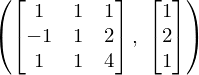

In [3]:
A = Matrix(3,3,[1,1,1,-1,1,2,1,1,4])
B = Matrix([1,2,1])
A,B

Next, we find the solution, using the fact that the solution to $AX=B$ is $X=A^{-1}B$, as long as $A$ is invertible.

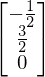

In [4]:
X = A**-1*B
X

Thus, we have $c_1=-\frac12$, $c_2=\frac32$, $c_3=0$, and our solution is

$$x_n = -\frac12(-1)^n+\frac32.$$

## Problem 2

Find a basis for the space $V$ of sequences $[x_n)$ satisfying the recurrence
$$x_{n+3} = -4x_n+3x_{n+2}.$$

Then find a formula for the sequence satisfying the initial conditions $x_0=1, x_1=-1, x_2=1$.

This time our associated polynomial is
$$p(x) = x^3-3x^2+4.$$
Factoring, we have:

In [5]:
factor(x**3-3*x**2+4)

This time, there's a repeated root. Our Theorem tells us that a basis for the space of solutions must be:

$$B = \{[(-1)^n), [2^n), [n2^n)\}.$$

Our general solution must be of the form 

$$[x_n) = c_1[(-1)^n)+c_2[2^n)+c_3[n2^n)=c_1T(1,-1,1)+c_2T(1,2,4)+c_3T(0,2,8).$$ 

Our intitial conditions are $x_0=1, x_1=-1, x_2=1$, corresponding to the sequence $[x_n)=T(1,-1,1)$.

This time we don't even need the help of the computer: $T(1,-1,1)$ is already one of our basis vectors! Thus, we must have $c_1=1, c_2=0, c_3=0$, and $x_n=(-1)^n$.



## Problem 3

Find a basis for the space $V$ of sequences $[x_n)$ satisfying the recurrence
$$x_{n+3} = 8x_n-12x_{n+1}+6x_{n+2}.$$

Then find a formula for the sequence satisfying the initial conditions $x_0=1, x_1=-1, x_2=1$.

Our associated polynomial is $p(x)=x^3-6x^2+12x-8$, which factors as

In [6]:
factor(x**3-6*x**2+12*x-8)

This time, we have a single root, repeated three times. Our basis for the space of solutions is therefore

$$B=\{[2^n), [n2^n), [n^22^n)\} = \{T(1,2,4), T(0,2,8), T(0,2,16)\}.$$

We want to find scalars $c_1,c_2,c_3$ so that
$$T(1,-1,1) = c_1T(1,2,4)+c_2T(0,2,8)+c_3T(0,2,16).$$

Our system is
$$\begin{bmatrix}1&0&0\\2&2&2\\4&8&16\end{bmatrix}\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}=\begin{bmatrix}1\\-1\\1\end{bmatrix}.$$

Solving, we have

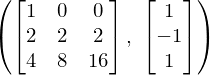

In [7]:
A2=Matrix(3,3,[1,0,0,2,2,2,4,8,16])
B2=Matrix([1,-1,1])
A2,B2

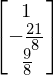

In [8]:
X2=A2**-1*B2
X2

Thus, we must have $c_1=1, c_2=-\frac{21}{8}$, and $c_3=\frac98$, giving us the sequence

$$x_n = 2^n-\frac{21}{8}n2^n+\frac98n^22^n.$$

By the way, you didn't have to check, but again, it might be interesting to confirm that our basis vectors really do work. We have
$$8\cdot 2^n-12\cdot 2^{n+1}+6\cdot 2^{n+2}  = 2^n(8-24+24) = 2^{n+3}$$

$$\begin{aligned}
8n 2^n -12(n+1) 2^{n+1} +6(n+2) 2^{n+2} & = 8n2^n-24n2^n -24+24n 2^n +48\\
& = 8n 2^n +24\\
& = (n+3)2^{n+3}
\end{aligned}$$

$$\begin{aligned}
8n^22^n-12(n+1)^22^{n+1}+6(n+2)^22^{n+2} & = 8n^22^{n}-24(n^2+2n+1)2^n+24(n^2+4n+4)2^n\\
& = 2^n(8n^2-24n^2-48n-24+24n^2+96n+96)\\
& = 2^n(8n^2+48n+72)\\
& = 2^{n}2^{3}(n^2+6n+9)\\
& = (n+3)^22^{n+3}
\end{aligned}$$

## Problem 4

Show that the shift operator $S$ is onto but not one-to-one. Find $\ker S$.

To see that $S$ is onto, given any sequence $[y_n) = (y_0,y_1,y_2,y_3,\ldots)$ in $\mathbb{R}^\infty$, let
$[x_n)$ be defined by
$$[x_n) = (1,y_0,y_1,y_2,\ldots).$$

Then we have $S[x_n)=[y_n)$ as required.

Next, we compute $\ker S$, and in so doing, show that $S$ is not one-to-one. We claim that

$$\ker S = \{[x_n) | x_0\in \mathbb{R} \text{ and } x_n=0 \text{ for all } n\geq 1\}.$$

That is, an element of $\ker S$ is of the form $(a,0,0,0,\ldots)$ for some real number $a$.

It is clear that any such sequence belongs to $\ker S$, since $S[x_n) = (x_1,x_2,x_3,\ldots) = (0,0,0,\ldots)$.

Moreover, if $[x_n)\in \ker S$, then

$$S[x_n) = S(x_0,x_1,x_2,\ldots) = (x_1,x_2,x_3,\dots) = (0,0,0,\ldots),$$

which shows that we must have $x_1=0, x_2=0, x_3=0,\ldots$, but we are free to assign any value we like to $x_0$.